<a href="https://colab.research.google.com/github/opopiol/ML_project/blob/model/model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import svm
from imblearn.over_sampling import SMOTE

### **Neptune**

In [ ]:
%pip install --upgrade --quiet neptune-client
#pip install neptune-notebooks

In [ ]:
import neptune.new as neptune
def run_neptune():
  run = neptune.init(project='opopiol/ML-project') # your credentials
run_neptune()

Info (NVML): Driver Not Loaded. GPU usage metrics may not be reported. For more information, see https://docs-legacy.neptune.ai/logging-and-managing-experiment-results/logging-experiment-data.html#hardware-consumption 


https://app.neptune.ai/opopiol/ML-project/e/MLPROJ-11
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/run#stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


### **Data import**

In [ ]:
def data_load():
  """This function loads data
    """
    train_data = pd.read_csv("/train_data.csv", header=None)
    test_data = pd.read_csv("/test_data.csv", header=None)
    labels = pd.read_csv("/train_labels.csv", header=None,  names=['y'])

### **Data splitting**

In [ ]:
def data_splitting():
  X, y = train_data, labels
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=1)

### **MODEL**

In [ ]:
def get_confusion_matrix(classifier):
    """This function returns a confusion matrix of given classifier
    :param classifier: classifier
    :return: print(confusion_matrix(y_test, y_pred)): confusion matrix of given classifier
    """
    m = classifier
    m.fit(X_train, y_train.values.ravel())
    y_pred = m.predict(X_test)
    print(confusion_matrix(y_test, y_pred))

### **Baseline**

For stratified strategy f1 score is 0.9052528227785959 with labels: [-1  1]
[[ 10 102]
 [102 911]]
For most_frequent strategy f1 score is 0.9476145930776426 with labels: [1]
[[   0  112]
 [   0 1013]]
For uniform strategy f1 score is 0.6451204055766793 with labels: [-1  1]
[[ 56  56]
 [473 540]]
For prior strategy f1 score is 0.9476145930776426 with labels: [1]
[[   0  112]
 [   0 1013]]


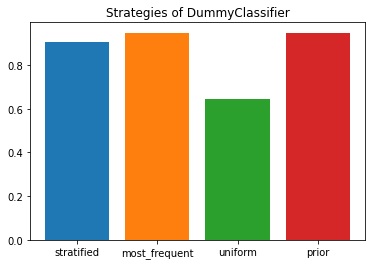

In [ ]:
#baseline
strategies = ['stratified', 'most_frequent', 'uniform', 'prior']

def dummy_base(list):
  """This function returns scores and plot with scores of the given strategies of DummyClassifier
    :param list: list of strategies
    :return: print(f'For {i} strategy score is {dummy_clf_score} with labels: {dummy_labels}'): scores of the strategies given in the list and labels
    :return: plt.bar(i, dummy_clf_score): plot with scores of the strategies given in the list
    :return: get_confusion_matrix(dummy_clf): function returning a confusion matrix
    """
  for i in list:
      dummy_clf = DummyClassifier(strategy=i)
      dummy_clf.fit(X_train, y_train.values.ravel())
      y_pred = dummy_clf.predict(X_test)
      dummy_clf_score = f1_score(y_test, y_pred)
      dummy_labels = np.unique(dummy_clf.predict(X_test))
      print(f'For {i} strategy f1 score is {dummy_clf_score} with labels: {dummy_labels}')
      get_confusion_matrix(dummy_clf)
      
      plt.title('Strategies of DummyClassifier')
      plt.bar(i, dummy_clf_score)
            
dummy_base(strategies)

In [ ]:
def base_decisiontree_clf():
    """This function returns score of DecisionTreeClassifier
    :return: print(dtc_clf.__class__.__name__, dtc_clf_score): score of the classifier
    :return: get_confusion_matrix(dtc_clf): function returning a confusion matrix
    """
    dtc_clf = DecisionTreeClassifier().fit(X, y)
    dtc_clf.fit(X_train, y_train.values.ravel())
    y_pred = dtc_clf.predict(X_test)
    dtc_clf_score = f1_score(y_test, y_pred)
    print(dtc_clf.__class__.__name__, dtc_clf_score)
    get_confusion_matrix(dtc_clf)

base_decisiontree_clf()

DecisionTreeClassifier 0.964057114721812
[[ 73  39]
 [ 32 981]]


LogisticRegression 0.891662506240639
[[ 15  97]
 [120 893]]
KNeighborsClassifier 0.9803921568627452
[[  85   27]
 [  13 1000]]
SVC 0.9767211490837047
[[ 92  20]
 [ 27 986]]


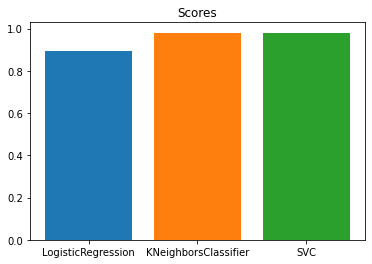

In [ ]:
log_clf = LogisticRegression(random_state=0, max_iter = 1000)
knn_clf = KNeighborsClassifier()
svm_clf = SVC()
#voting_clf = VotingClassifier()

clf_list = [log_clf, knn_clf, svm_clf]

def clf_scores(list):
  """This function returns scores and plot with scores of the classifiers given in the list
    :param list: list of classifiers
    :return: print(clf.__class__.__name__, accuracy_score(y_test, y_pred)): scores of the classifiers given in the list
    :return: plt.bar(clf.__class__.__name__, accuracy_score(y_test, y_pred)): plot with scores of the classifiers given in the list
    :return: get_confusion_matrix(clf): function returning a confusion matrix
    """
  for clf in list:
    clf.fit(X_train, y_train.values.ravel())
    y_pred = clf.predict(X_test)
    clf_score = f1_score(y_test, y_pred)
    print(clf.__class__.__name__, clf_score)
    get_confusion_matrix(clf)


    plt.title('Scores')
    plt.bar(clf.__class__.__name__, clf_score);

clf_scores(clf_list)


### **AdaBoostClassifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ab_clf = AdaBoostClassifier()

def get_parameters(clf):
  """This function returns parameters of given classifier
    param: clf: choosen classifier
    :return: print(clf.get_params().keys()): list of parameters of given classifier
    """
  print(clf.get_params().keys())

get_parameters(ab_clf)

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])


In [ ]:
def base_adaboost_clf():
    """This function returns score of AdaBoostClassifier
    :return: print(ab_clf_clf.__class__.__name__, ab_clf_score): score of the classifier
    :return: get_confusion_matrix(ab_clf): function returning a confusion matrix
    """
    ab_clf = AdaBoostClassifier()
    ab_clf.fit(X_train, y_train.values.ravel())
    y_pred = ab_clf.predict(X_test)
    ab_clf_score = f1_score(y_test, y_pred)
    print(ab_clf.__class__.__name__, ab_clf_score)
    get_confusion_matrix(ab_clf)

base_adaboost_clf()

AdaBoostClassifier 0.9656188605108056
[[ 72  40]
 [ 30 983]]


In [ ]:
def pipeline_ab_clf(x_1: np.array, x_2: np.array, y_1: np.array, y_2: np.array):
    """This function returns best model from given paramerters
    :param: x_1: np.array: train data after splitting
    :param: x_2: np.array: test data after splitting
    :param: y_1: np.array: train of values after splitting
    :param: y_2: np.array: test of values after splitting

    :return: print(best_model.best_estimator_): returns best model out of given
    :return: print("The score of the model is:",f1_score(y_test, y_pred)): returns f1_score from choosen best model
    :return: print(confusion_matrix(y_test, y_pred)): returns confusion_matrix
    """
    classifier = AdaBoostClassifier()
    param = [{'n_estimators': [50, 100, 150],
            'learning_rate': [0.1, 0.01, 0.05]}]

    grid_search = GridSearchCV(classifier,
                              param,
                              cv=3,
                              verbose=2,
                              n_jobs=-1,
                              scoring='f1')

    
    best_model = grid_search.fit(x_2, y_2.values.ravel())
    print(best_model.best_estimator_)
    y_pred = best_model.predict(x_2)
    print("The score of the model is:",f1_score(y_2, y_pred))
    print(confusion_matrix(y_2, y_pred))


pipeline_ab_clf(X_train, X_test, y_train, y_test)


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 28.9min finished


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.05,
                   n_estimators=50, random_state=None)
The score of the model is: 0.9793510324483775
[[ 87  25]
 [ 17 996]]


### **Final model**

In [ ]:
def results_to_csv(df):
  """This function returns the csv file out of given data
  param: df: dataset to compile
  :return: df.to_csv('model_results.csv'): the csv file
  """
  df = pd.DataFrame([df])
  df.to_csv('model_results.csv')

In [ ]:
#creating final pipeline

def pipeline_final_model():
    """
    :return: print(best_model.best_estimator_): returns best model out of given
    :return: y_pred: array with predicted labels
    """
    pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components = 0.99)), ('classifier', SVC())])

    search_space = [{'pca': [PCA(n_components = 0.99)]},
                    {'classifier': [SVC()],
                    'classifier__kernel': ['linear', 'poly'],
                    'classifier__class_weight': ['balanced'],
                    'classifier__C': np.logspace(1,4,5)},
                    {'classifier': [KNeighborsClassifier()],
                    'classifier__n_neighbors': [2, 4, 6, 8, 10],
                    'classifier__algorithm': ['auto']},
                    {'classifier': [AdaBoostClassifier()],
                    'classifier__n_estimators': [50],
                    'classifier__learning_rate': [0.1]}]

    grid_search = GridSearchCV(pipe,
                              search_space,
                              cv=3,
                              verbose=2,
                              n_jobs=-1,
                              scoring='f1')
    
    best_model = grid_search.fit(X_train, y_train.values.ravel())
    print(best_model.best_estimator_)
    y_pred = best_model.predict(test_data)
    return y_pred
    results_to_csv(y_pred)


pipeline_final_model()

Fitting 3 folds for each of 17 candidates, totalling 51 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed: 11.1min finished


Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=0.99,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                                    learning_rate=0.1, n_estimators=50,
                                    random_state=None))],
         verbose=False)


array([-1,  1,  1, ...,  1,  1, -1], dtype=int8)